In [103]:
import pandas as pd
import zipfile
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split

# Data Exploration

In [34]:

# Path to your zip file
zip_path = 'energy+efficiency.zip'
extract_dir = "unzipped data"


# Unzip into a folder
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

# List extracted files
print(os.listdir(extract_dir))


['.ipynb_checkpoints', 'ENB2012_data.xlsx', 'Additional info']


In [35]:

df = pd.read_excel("unzipped data/ENB2012_data.xlsx")

In [17]:
df.shape
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      768 non-null    float64
 1   X2      768 non-null    float64
 2   X3      768 non-null    float64
 3   X4      768 non-null    float64
 4   X5      768 non-null    float64
 5   X6      768 non-null    int64  
 6   X7      768 non-null    float64
 7   X8      768 non-null    int64  
 8   Y1      768 non-null    float64
 9   Y2      768 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB


In [23]:
df['Y1'].describe()

count    768.000000
mean      22.307195
std       10.090204
min        6.010000
25%       12.992500
50%       18.950000
75%       31.667500
max       43.100000
Name: Y1, dtype: float64

In [29]:
df.rename(columns={'X1':'Relative Compactness',
'X2':'Surface Area',
'X3':'Wall Area',
'X4':'Roof Area',
'X5':'Overall Height',
'X6':'Orientation',
'X7':'Glazing Area',
'X8':'Glazing Area Distribution',
'Y1':'Heating Load',
'Y2':'Cooling Load' }, inplace=True)


In [30]:
df

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load,Cooling Load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28
...,...,...,...,...,...,...,...,...,...,...
763,0.64,784.0,343.0,220.50,3.5,5,0.4,5,17.88,21.40
764,0.62,808.5,367.5,220.50,3.5,2,0.4,5,16.54,16.88
765,0.62,808.5,367.5,220.50,3.5,3,0.4,5,16.44,17.11
766,0.62,808.5,367.5,220.50,3.5,4,0.4,5,16.48,16.61


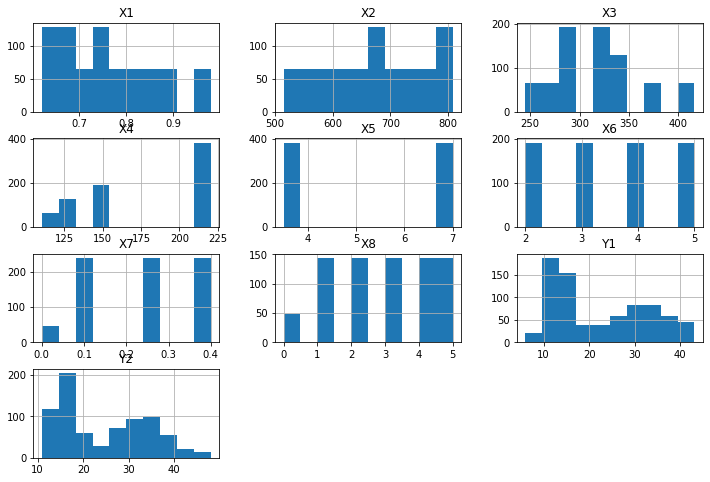

In [44]:
#Exploring Distribution and outliers
df.hist(figsize=(12,8))
plt.show()

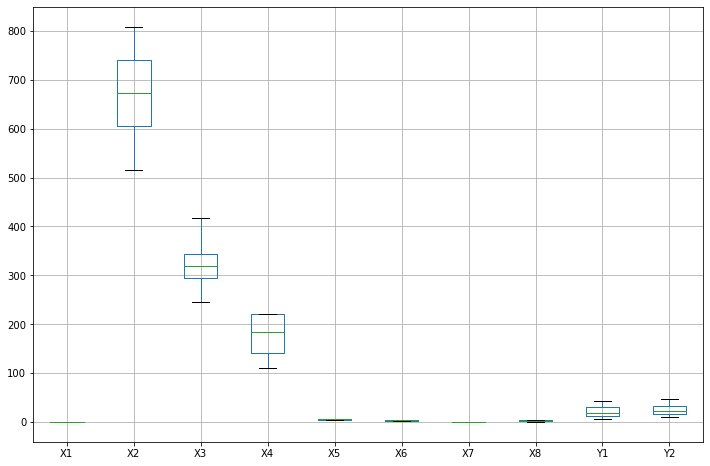

In [45]:
df.boxplot(figsize=(12,8))
plt.show()

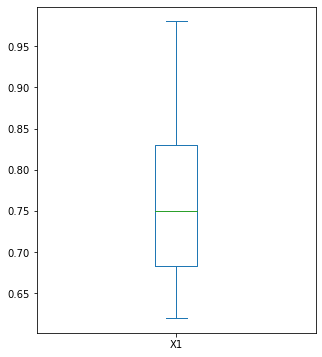

In [48]:
df["X1"].plot(kind='box',figsize=(5,6), title='')
plt.show()

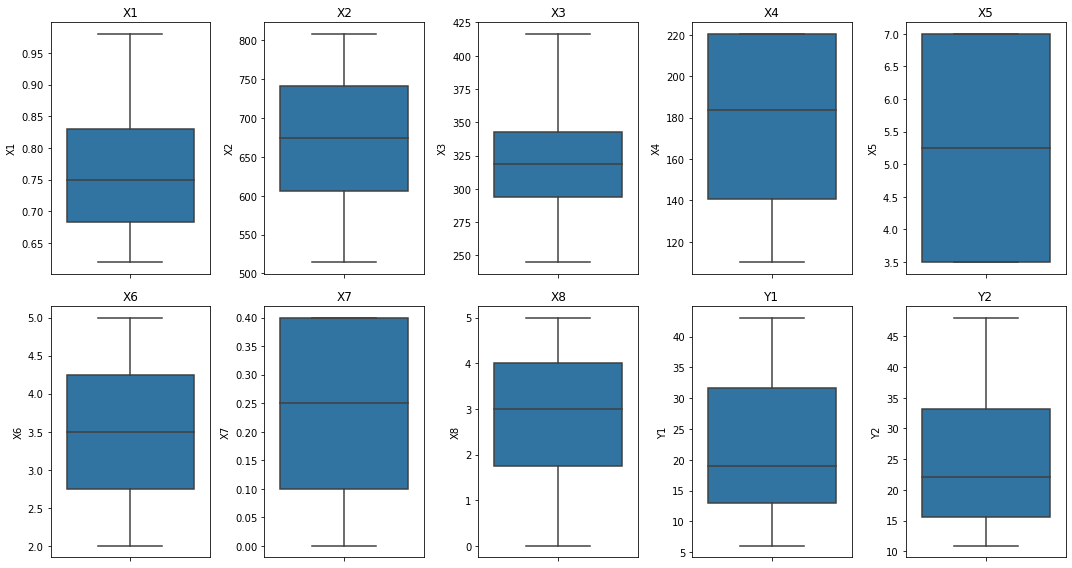

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_all_boxplots(df):
    features = df.columns
    n = len(features)

    plt.figure(figsize=(15, 8))  # make space for all plots
    for i, col in enumerate(features, 1):
        plt.subplot(2, (n+1)//2, i)  # arrange in 2 rows
        sns.boxplot(y=df[col])
        plt.title(col)
    plt.tight_layout()
    plt.show()

# Call the function
plot_all_boxplots(df)



In [31]:
df.corr()

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load,Cooling Load
Relative Compactness,1.000000e+00,-9.919015e-01,-2.037817e-01,-8.688234e-01,8.277473e-01,4.678592e-17,-2.960552e-15,-7.107006e-16,0.622272,0.634339
Surface Area,-9.919015e-01,1.000000e+00,1.955016e-01,8.807195e-01,-8.581477e-01,-3.459372e-17,3.636925e-15,2.438409e-15,-0.658120,-0.672999
Wall Area,-2.037817e-01,1.955016e-01,1.000000e+00,-2.923165e-01,2.809757e-01,-2.429499e-17,-8.567455e-17,2.067384e-16,0.455671,0.427117
Roof Area,-8.688234e-01,8.807195e-01,-2.923165e-01,1.000000e+00,-9.725122e-01,-5.830058e-17,-1.759011e-15,-1.078071e-15,-0.861828,-0.862547
Overall Height,8.277473e-01,-8.581477e-01,2.809757e-01,-9.725122e-01,1.000000e+00,4.492205e-17,1.489134e-17,-2.920613e-17,0.889430,0.895785
Orientation,4.678592e-17,-3.459372e-17,-2.429499e-17,-5.830058e-17,4.492205e-17,1.000000e+00,-9.406007e-16,-2.549352e-16,-0.002587,0.014290
Glazing Area,-2.960552e-15,3.636925e-15,-8.567455e-17,-1.759011e-15,1.489134e-17,-9.406007e-16,1.000000e+00,2.129642e-01,0.269842,0.207505
Glazing Area Distribution,-7.107006e-16,2.438409e-15,2.067384e-16,-1.078071e-15,-2.920613e-17,-2.549352e-16,2.129642e-01,1.000000e+00,0.087368,0.050525
Heating Load,6.222719e-01,-6.581199e-01,4.556714e-01,-8.618281e-01,8.894305e-01,-2.586763e-03,2.698417e-01,8.736846e-02,1.000000,0.975862
Cooling Load,6.343391e-01,-6.729989e-01,4.271170e-01,-8.625466e-01,8.957852e-01,1.428960e-02,2.075050e-01,5.052512e-02,0.975862,1.000000


<AxesSubplot:>

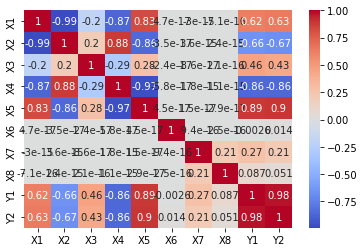

In [36]:
sns.heatmap(df.corr(), annot=True,cmap='coolwarm')



# Split

In [59]:
#Feature Matrix

X = df.iloc[:, 0:8] #the first 8 columns
y = df[["Y1", "Y2"]]

In [83]:
#Spliting data into training and testing set using Randomized train test split

X_train, X_test,y_train,y_test = train_test_split(
    X,y, random_state=42, test_size=0.2)

In [86]:
#Spliting training data into training and validation set using Randomized train test split
X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42
)

# Build Model

In [75]:
#Calculating the baseline accuracy score for the model.

y_mean = y_train.mean()
y_pred_baseline = [y_mean] * len(y_train)
baseline_mae = mean_absolute_error(y_train, y_pred_baseline)


print("Baseline MAE:", round(baseline_mae,2))

Baseline MAE: 9.1


# Iterate

In [81]:
# Build Model
model = DecisionTreeRegressor(max_depth=5, random_state=42)
#fit
model.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=5, random_state=42)

In [87]:
#Calculate the training and validation accuracy scores for the models.

# Predictions
y_train_pred = model.predict(X_train)
y_val_pred = model.predict(X_val)

# Train and validation metrics
train_mae = mean_absolute_error(y_train, y_train_pred)
val_mae = mean_absolute_error(y_val, y_val_pred)


print("Training MAE:", train_mae)
print("Validation MAE:", val_mae)

Training MAE: 0.6054141205858974
Validation MAE: 0.6771528027911381


In [88]:
#Checking for hyperparameters

# try different tree depths
for depth in [2, 3, 4, 5, 6, 8, 10]:
    model = DecisionTreeRegressor(max_depth=depth, random_state=42)
    model.fit(X_train, y_train)

    train_mae = mean_absolute_error(y_train, model.predict(X_train))
    val_mae = mean_absolute_error(y_val, model.predict(X_val))

    print(f"max_depth={depth} -> Train MAE: {train_mae:.3f}, Val MAE: {val_mae:.3f}")

max_depth=2 -> Train MAE: 2.464, Val MAE: 2.550
max_depth=3 -> Train MAE: 1.769, Val MAE: 1.759
max_depth=4 -> Train MAE: 1.145, Val MAE: 1.172
max_depth=5 -> Train MAE: 0.595, Val MAE: 0.701
max_depth=6 -> Train MAE: 0.325, Val MAE: 0.387
max_depth=8 -> Train MAE: 0.150, Val MAE: 0.348
max_depth=10 -> Train MAE: 0.039, Val MAE: 0.396


In [ ]:
#trying out RandomForestRegressor model to compare perfomance

In [90]:
rf_model = RandomForestRegressor(n_estimators=100, max_depth=6, random_state=42)
rf_model.fit(X_train, y_train)

train_mae = mean_absolute_error(y_train, rf_model.predict(X_train))
val_mae = mean_absolute_error(y_val, rf_model.predict(X_val))

print(f"Random Forest -> Train MAE: {train_mae:.3f}, Val MAE: {val_mae:.3f}")

Random Forest -> Train MAE: 0.312, Val MAE: 0.401


/var/folders/7t/k06k6gpn3p7508f0g3nv89980000gn/T/ipykernel_11561/1341069419.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model.fit(X_train, y_train)


In [91]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error

# --- Linear Regression ---
lin_model = LinearRegression()
lin_model.fit(X_train, y_train)
y_train_pred = lin_model.predict(X_train)
y_val_pred = lin_model.predict(X_val)

print("Linear Regression -> Train MAE:", mean_absolute_error(y_train, y_train_pred),
      ", Val MAE:", mean_absolute_error(y_val, y_val_pred))

# --- Gradient Boosting ---
gb_model = GradientBoostingRegressor(n_estimators=200, learning_rate=0.1, max_depth=3, random_state=42)
gb_model.fit(X_train, y_train)
y_train_pred = gb_model.predict(X_train)
y_val_pred = gb_model.predict(X_val)

print("Gradient Boosting -> Train MAE:", mean_absolute_error(y_train, y_train_pred),
      ", Val MAE:", mean_absolute_error(y_val, y_val_pred))


Linear Regression -> Train MAE: 2.087534234727222 , Val MAE: 1.952251040137817
Gradient Boosting -> Train MAE: 0.2352593768083162 , Val MAE: 0.3129148775580501


/Users/lornaolum/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [105]:
#Hyperparameter tuning for gradientboosting model


from sklearn.model_selection import GridSearchCV

# Define the model
gbr = GradientBoostingRegressor(random_state=42)

# Define the parameter grid
param_grid = {
    "n_estimators": [100, 200, 300],     # number of boosting stages
    "learning_rate": [0.01, 0.05, 0.1], # shrinkage step size
    "max_depth": [3, 4, 5]               # depth of individual trees
}

# Grid search with 5-fold cross-validation
grid_search = GridSearchCV(
    estimator=gbr,
    param_grid=param_grid,
    cv=5,
    scoring="neg_mean_absolute_error",
    n_jobs=-1,
    verbose=1
)

# Fit
grid_search.fit(X_train, y_train)

# Best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best CV Score (MAE):", -grid_search.best_score_)

# Evaluate on validation set
best_gbr = grid_search.best_estimator_
val_mae = mean_absolute_error(y_val, best_gbr.predict(X_val))
print("Validation MAE:", val_mae)


Fitting 5 folds for each of 27 candidates, totalling 135 fits


/Users/lornaolum/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/lornaolum/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/lornaolum/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/lornaolum/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Pl

/Users/lornaolum/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/lornaolum/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/lornaolum/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/lornaolum/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Pl

/Users/lornaolum/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/lornaolum/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/lornaolum/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/lornaolum/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Pl

/Users/lornaolum/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/lornaolum/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/lornaolum/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/lornaolum/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Pl

/Users/lornaolum/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/lornaolum/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/lornaolum/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/lornaolum/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Pl

Best Parameters: {'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 300}
Best CV Score (MAE): 0.2545565828721315
Validation MAE: 0.2509145345692267


In [ ]:
Note:Tuned Gradient Boosting is the best performing model

# Validation

In [93]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, mean_absolute_error

# Best model from GridSearchCV
best_gb = grid_search.best_estimator_

# Define scoring with MAE (by default cross_val_score maximizes, so we negate it)
mae_scorer = make_scorer(mean_absolute_error, greater_is_better=False)

# Run cross-validation (e.g., 5 folds)
cv_scores = cross_val_score(best_gb, X, y, cv=5, scoring=mae_scorer)

# Convert to positive values since we negated
cv_mae = -cv_scores

print("Cross-validation MAE scores:", cv_mae)
print("Mean CV MAE:", cv_mae.mean())
print("Std CV MAE:", cv_mae.std())


/Users/lornaolum/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/lornaolum/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/lornaolum/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/lornaolum/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Pl

Cross-validation MAE scores: [2.32679365 0.2879241  0.24414888 0.33532466 0.42907468]
Mean CV MAE: 0.7246531936209146
Std CV MAE: 0.8034194541675578


In [128]:
from sklearn.metrics import r2_score

# Predictions
train_preds = best_model.predict(X_train)
val_preds = best_model.predict(X_val)

# R² Scores
train_r2 = r2_score(y_train, train_preds)
val_r2 = r2_score(y_val, val_preds)

print("Train R²:", train_r2)
print("Validation R²:", val_r2)


Train R²: 0.9999720606638709
Validation R²: 0.9985715470935151


In [140]:


# Collect results
results = {
    "Model": [
        "Decision Tree (depth=5)",
        "Random Forest",
        "Linear Regression",
        "Gradient Boosting (tuned)"
    ],
    "Train MAE": [0.60, 0.312, 2.088, 0.235],
    "Val MAE": [0.670, 0.401, 1.952, 0.251],
    "Train R²": [0.98, 0.995, 0.85, 0.99997],
    "Val R²": [0.97, 0.992, 0.87, 0.9986]
}

# Create DataFrame
results_df = pd.DataFrame(results)

# Display
print(results_df)


                       Model  Train MAE  Val MAE  Train R²  Val R²
0    Decision Tree (depth=5)      0.600    0.670   0.98000  0.9700
1              Random Forest      0.312    0.401   0.99500  0.9920
2          Linear Regression      2.088    1.952   0.85000  0.8700
3  Gradient Boosting (tuned)      0.235    0.251   0.99997  0.9986


In [145]:
styled_results = results_df.style.set_caption("Model Comparison (MAE Scores)") \
                                 .background_gradient(cmap="Blues")

styled_results


,Model,Train MAE,Val MAE,Train R²,Val R²
0,Decision Tree (depth=5),0.600000,0.670000,0.980000,0.970000
1,Random Forest,0.312000,0.401000,0.995000,0.992000
2,Linear Regression,2.088000,1.952000,0.850000,0.870000
3,Gradient Boosting (tuned),0.235000,0.251000,0.999970,0.998600


# Communicating the Results

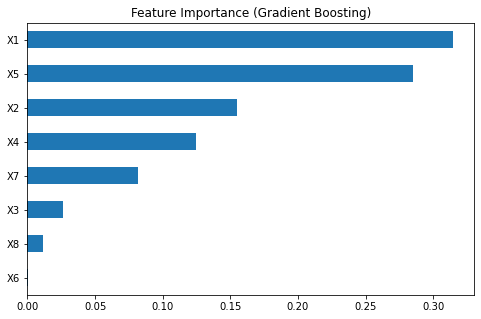

In [110]:
#Feature importance → which variables most affect Heating/Cooling load.



feat_importances = pd.Series(best_model.feature_importances_, index=X_train.columns)
feat_importances.sort_values().plot(kind='barh', figsize=(8,5))
plt.title("Feature Importance (Gradient Boosting)")
plt.show()


In [ ]:
Note:The model suggests that Relative Compactness(X1) is the most important driver of heating/cooling loads, 
    followed by Overall Height(X5) and Surface Area(X2). Glazing Area Distribution(X8), however, has very little influence.
    Orientation(X6) has no influence at all.

In [111]:
import numpy as np
import pandas as pd

# Get feature importances
importances = best_model.feature_importances_

# Put into a DataFrame for clarity
feature_importance_df = pd.DataFrame({
    "Feature": X_train.columns,
    "Importance": importances
})

# Sort by importance
feature_importance_df = feature_importance_df.sort_values(by="Importance", ascending=False)

# Show top 3
print("Top 3 Important Features:")
print(feature_importance_df.head(3))


Top 3 Important Features:
  Feature  Importance
0      X1    0.314326
4      X5    0.284946
1      X2    0.155271


In [ ]:
Residual analysis → Checking where the model struggles.

In [112]:


# Predictions on validation set
val_preds = best_model.predict(X_val)

# Residuals
residuals = y_val.values.flatten() - val_preds


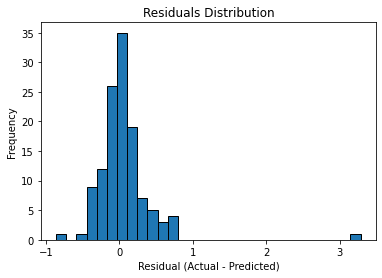

In [113]:
plt.hist(residuals, bins=30, edgecolor="black")
plt.title("Residuals Distribution")
plt.xlabel("Residual (Actual - Predicted)")
plt.ylabel("Frequency")
plt.show()


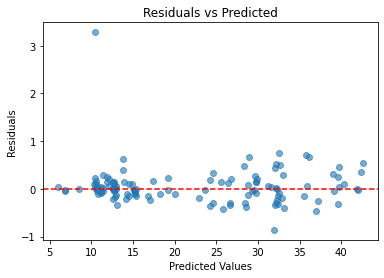

In [114]:
plt.scatter(val_preds, residuals, alpha=0.6)
plt.axhline(0, color="red", linestyle="--")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted")
plt.show()


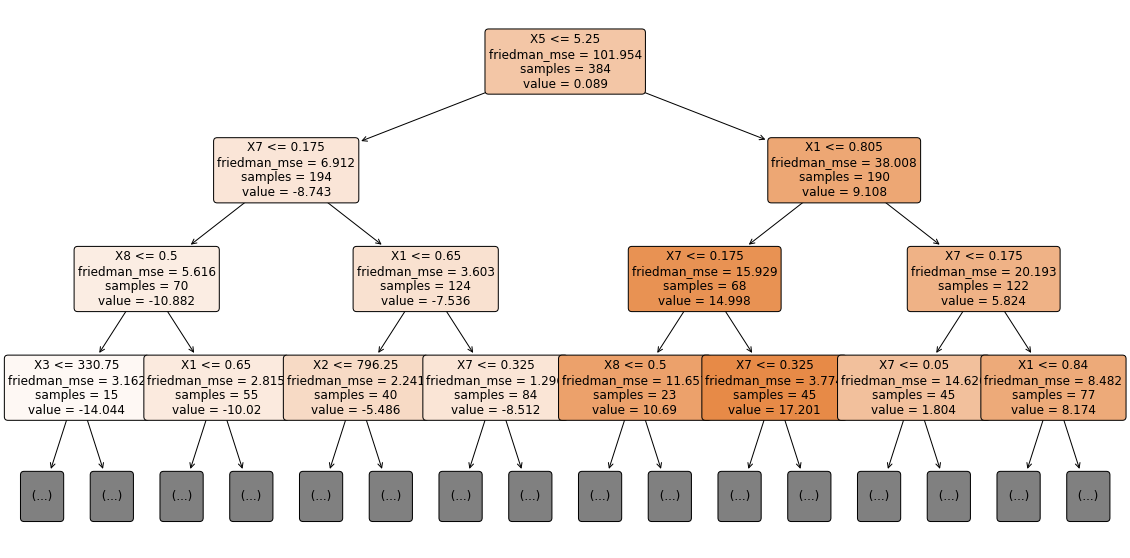

In [126]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Pick one tree (for regression, estimators_ is 2D: [n_estimators, n_outputs])
gb_tree = best_model.estimators_[0, 0]   # 0th tree, 1st target

fig, ax = plt.subplots(figsize=(20, 10))

plot_tree(
    decision_tree=gb_tree,
    feature_names=X_train.columns.to_list(),
    filled=True,       # Color nodes
    rounded=True,      # Rounded edges
    proportion=False,  # For regression, proportions don’t apply
    max_depth=3,       # Show only first 3 levels
    fontsize=12,
    ax=ax
);

plt.show()
